In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [2]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')


In [3]:
matches.head(); matches.shape; matches.columns


Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [4]:
matches.info(); matches.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [5]:
deliveries.head(); deliveries.shape; deliveries.columns
deliveries.info(); deliveries.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [6]:
matches = matches.drop_duplicates()
deliveries = deliveries.drop_duplicates()

In [7]:
matches.to_csv('matches_clean.csv', index=False)
deliveries.to_csv('deliveries_clean.csv', index=False)


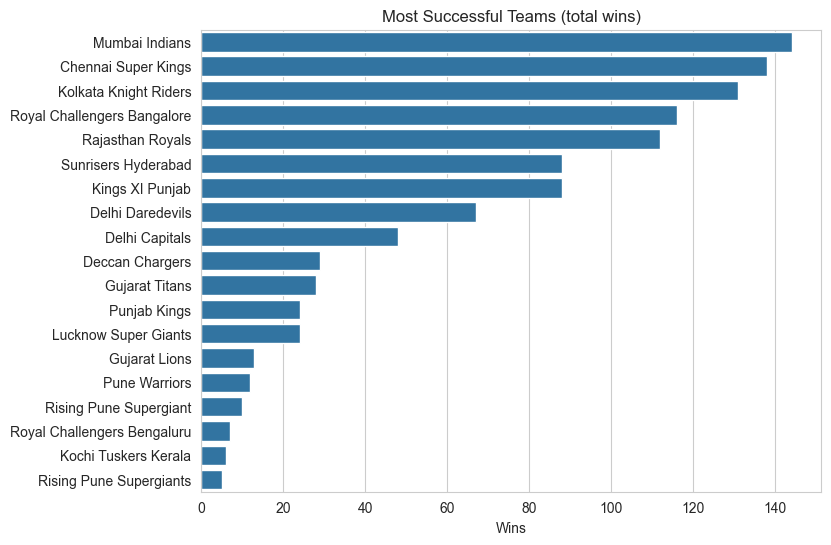

In [8]:
wins = matches['winner'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(y=wins.index, x=wins.values)
plt.title('Most Successful Teams (total wins)')
plt.xlabel('Wins'); plt.ylabel('')
plt.show()


<Figure size 1400x700 with 0 Axes>

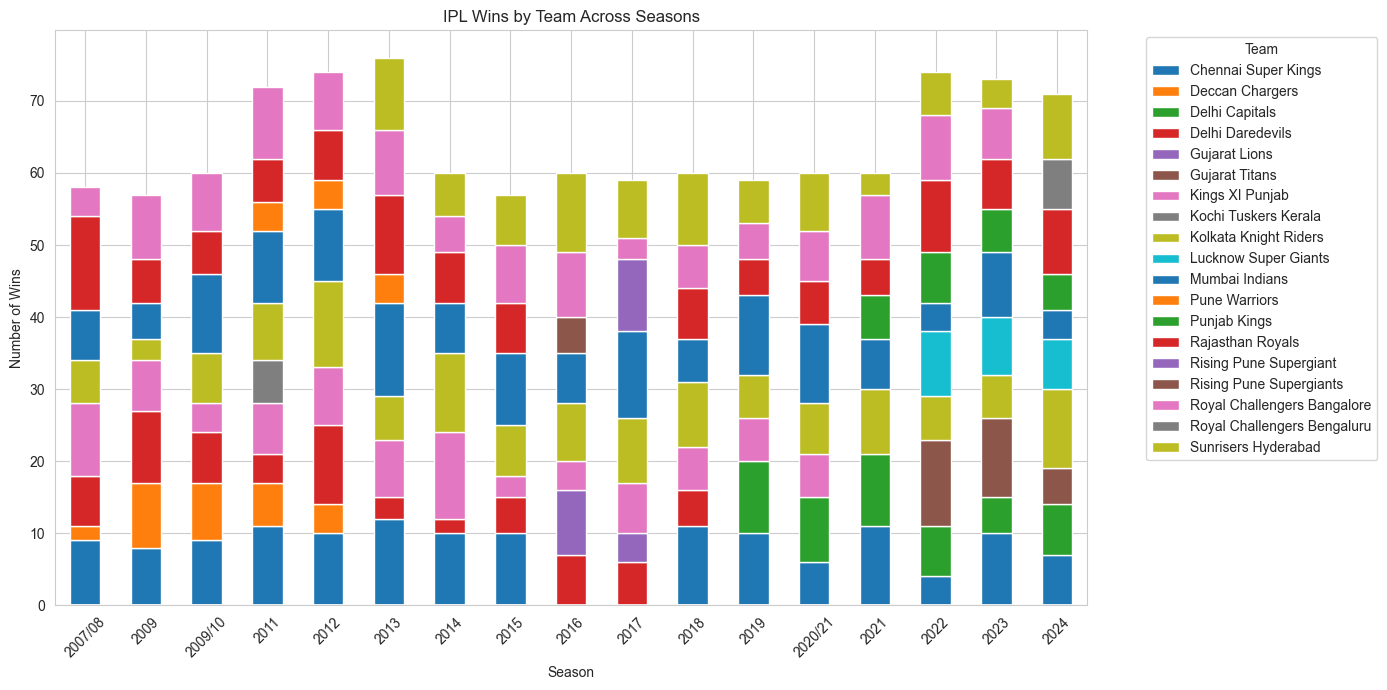

In [9]:
plt.figure(figsize=(14,7))

# Create a pivot table: rows = seasons, columns = winners, values = count of wins
pivot_df = matches.pivot_table(index='season', 
                               columns='winner', 
                               aggfunc='size', 
                               fill_value=0)

# Plot stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(14,7))

plt.title('IPL Wins by Team Across Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.legend(title='Team', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


Proportion where toss winner also won match: 0.51


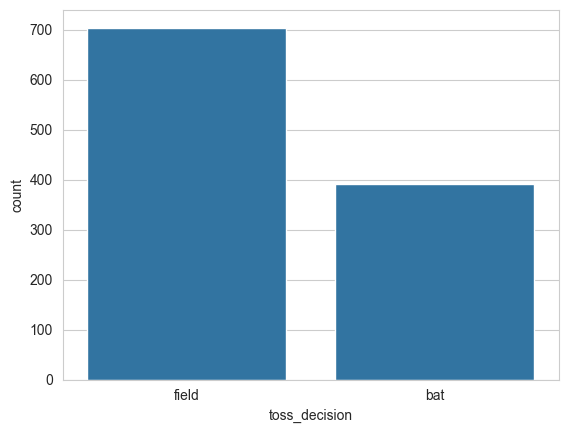

In [10]:
matches['toss_decision'].value_counts()
sns.countplot(x='toss_decision', data=matches)
# toss winner vs match winner
prop = (matches['toss_winner']==matches['winner']).mean()
print(f'Proportion where toss winner also won match: {prop:.2f}')


In [11]:
matches['player_of_match'].value_counts().head(10)


player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
V Kohli           18
DA Warner         18
MS Dhoni          17
YK Pathan         16
RA Jadeja         16
SR Watson         16
AD Russell        15
Name: count, dtype: int64

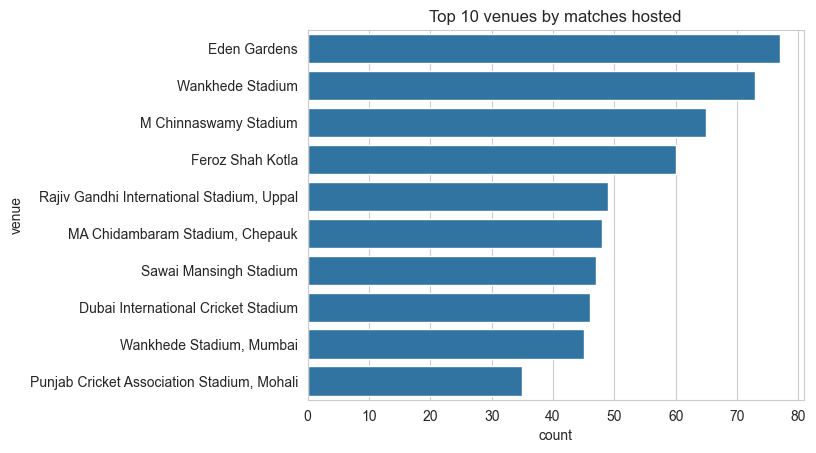

In [12]:
matches['venue'].value_counts().head(10)
sns.countplot(y='venue', data=matches, order=matches['venue'].value_counts().head(10).index)
plt.title('Top 10 venues by matches hosted')
plt.show()


In [13]:
cols = deliveries.columns

# Detect correct column names
batsman_col = 'batsman' if 'batsman' in cols else 'striker' if 'striker' in cols else 'batter'
runs_col = 'batsman_runs' if 'batsman_runs' in cols else 'batter_runs' if 'batter_runs' in cols else 'runs_off_bat'

# Group runs
batsman_runs = deliveries.groupby(batsman_col)[runs_col].sum().sort_values(ascending=False)

batsman_runs.head(15)


batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
KL Rahul          4689
AM Rahane         4642
F du Plessis      4571
SV Samson         4419
AT Rayudu         4348
Name: batsman_runs, dtype: int64

In [14]:
wickets = deliveries[deliveries['dismissal_kind'].notna() & (deliveries['dismissal_kind']!='run out')]
wickets_count = wickets.groupby('bowler').size().sort_values(ascending=False)
wickets_count.head(15)


bowler
YS Chahal          205
PP Chawla          192
DJ Bravo           183
R Ashwin           181
B Kumar            181
SP Narine          180
A Mishra           174
SL Malinga         170
JJ Bumrah          168
RA Jadeja          160
Harbhajan Singh    150
Rashid Khan        149
UT Yadav           144
Sandeep Sharma     137
HV Patel           135
dtype: int64

In [15]:
cols = deliveries.columns

# Detect batsman column
batsman_col = 'batsman' if 'batsman' in cols else (
    'striker' if 'striker' in cols else 'batter'
)

# Detect runs column
runs_col = 'batsman_runs' if 'batsman_runs' in cols else (
    'batter_runs' if 'batter_runs' in cols else 'runs_off_bat'
)

# Sixes
sixes = deliveries[deliveries[runs_col] == 6].groupby(batsman_col).size().sort_values(ascending=False)

# Fours
fours = deliveries[deliveries[runs_col] == 4].groupby(batsman_col).size().sort_values(ascending=False)

sixes.head(10), fours.head(10)


(batter
 CH Gayle          359
 RG Sharma         281
 V Kohli           273
 AB de Villiers    253
 MS Dhoni          252
 DA Warner         236
 KA Pollard        224
 AD Russell        209
 SV Samson         206
 SK Raina          204
 dtype: int64,
 batter
 S Dhawan        768
 V Kohli         708
 DA Warner       663
 RG Sharma       599
 SK Raina        506
 G Gambhir       492
 RV Uthappa      481
 AM Rahane       479
 KD Karthik      466
 F du Plessis    422
 dtype: int64)

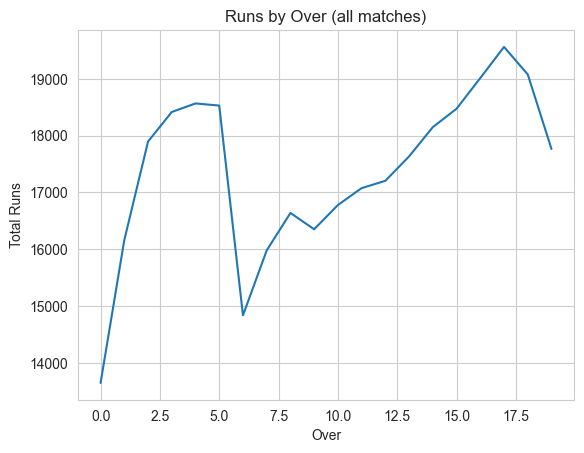

In [16]:
over_runs = deliveries.groupby('over')['total_runs'].sum()
plt.plot(over_runs.index, over_runs.values)
plt.title('Runs by Over (all matches)')
plt.xlabel('Over'); plt.ylabel('Total Runs'); plt.show()


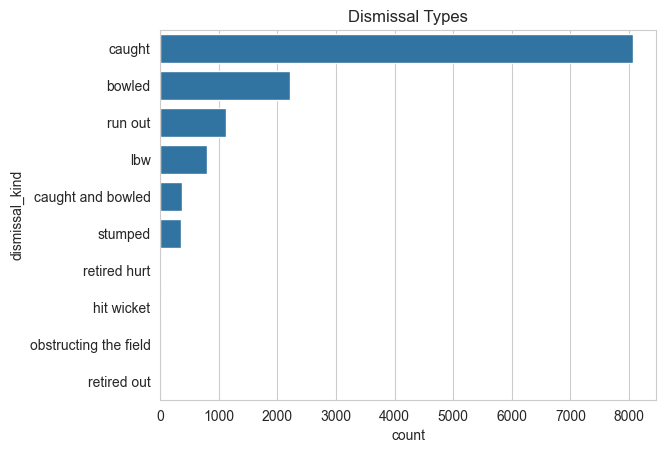

In [17]:
sns.countplot(y='dismissal_kind', data=deliveries, order=deliveries['dismissal_kind'].value_counts().index)
plt.title('Dismissal Types'); plt.show()


In [18]:
# deliveries has match_id which corresponds to matches['id']
# if match_id column names differ, align them
deliveries = deliveries.merge(matches[['id','season','winner','venue']], left_on='match_id', right_on='id', how='left')


In [19]:
deliveries['season'].unique()


array(['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022',
       '2023', '2024'], dtype=object)

In [22]:
deliveries['is_boundary'] = deliveries['batsman_runs'] >= 4
deliveries['is_dot'] = deliveries['total_runs'] == 0
deliveries['is_wicket'] = deliveries['dismissal_kind'].notna() & (deliveries['dismissal_kind'] != 'run out')


In [24]:
deliveries.columns


Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', 'winner', 'venue',
       'is_boundary', 'is_dot'],
      dtype='object')

In [25]:
boundary_counts = (
    deliveries.groupby('batter')['is_boundary']
    .sum()
    .sort_values(ascending=False)
)

boundary_counts.head(10)


batter
V Kohli           981
S Dhawan          923
DA Warner         900
RG Sharma         881
CH Gayle          767
SK Raina          711
AB de Villiers    667
RV Uthappa        666
KD Karthik        630
MS Dhoni          615
Name: is_boundary, dtype: int64

In [27]:
wicket_counts = (
    deliveries.groupby('bowler')['is_wicket']
    .sum()
    .sort_values(ascending=False)
)

wicket_counts.head(10)


bowler
YS Chahal     205
PP Chawla     192
DJ Bravo      183
R Ashwin      181
B Kumar       181
SP Narine     180
A Mishra      174
SL Malinga    170
JJ Bumrah     168
RA Jadeja     160
Name: is_wicket, dtype: int64

In [28]:
batsman_stats = deliveries.groupby('batter').agg(
    runs=('batsman_runs', 'sum'),
    balls=('ball', 'count')
)

batsman_stats['strike_rate'] = (batsman_stats['runs'] / batsman_stats['balls']) * 100

batsman_stats = batsman_stats[batsman_stats['balls'] >= 100]

batsman_stats.sort_values('strike_rate', ascending=False).head(10)


,runs,balls,strike_rate
batter,,,
J Fraser-McGurk,330,150,220.000000
WG Jacks,230,133,172.932331
PD Salt,653,385,169.610390
T Stubbs,405,239,169.456067
TM Head,772,458,168.558952
AD Russell,2488,1515,164.224422
BCJ Cutting,238,146,163.013699
H Klaasen,993,613,161.990212
Ramandeep Singh,170,106,160.377358


In [31]:
balls_faced = deliveries[deliveries['batsman_runs']>=0].groupby('batter').size()
runs_scored = deliveries.groupby('batter')['batsman_runs'].sum()

strike_rate = (runs_scored / balls_faced * 100).dropna()

strike_rate = strike_rate[balls_faced >= 100].sort_values(ascending=False)
strike_rate.head(10)


batter
J Fraser-McGurk    220.000000
WG Jacks           172.932331
PD Salt            169.610390
T Stubbs           169.456067
TM Head            168.558952
AD Russell         164.224422
BCJ Cutting        163.013699
H Klaasen          161.990212
Ramandeep Singh    160.377358
Ashutosh Sharma    160.169492
dtype: float64

In [32]:
death = deliveries[deliveries['over'] >= 16]

death_wickets = death[death['is_wicket']].groupby('bowler').size().sort_values(ascending=False)
death_wickets.head(10)


bowler
DJ Bravo          102
SL Malinga         90
B Kumar            85
JJ Bumrah          80
HV Patel           63
MM Sharma          61
SP Narine          60
Mohammed Shami     58
CH Morris          55
K Rabada           52
dtype: int64

In [33]:
season_team_runs = deliveries.groupby(['season','batting_team'])['total_runs'].sum()
season_team_runs.unstack().fillna(0).head()


batting_team,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Gujarat Titans,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Pune Warriors,Punjab Kings,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Royal Challengers Bengaluru,Sunrisers Hyderabad
season,,,,,,,,,,,,,,,,,,,
2007/08,2520.0,2229.0,0.0,2118.0,0.0,0.0,2464.0,0.0,1942.0,0.0,2080.0,0.0,0.0,2601.0,0.0,0.0,1983.0,0.0,0.0
2009,2231.0,2408.0,0.0,2131.0,0.0,0.0,1928.0,0.0,1772.0,0.0,1897.0,0.0,0.0,1706.0,0.0,0.0,2280.0,0.0,0.0
2009/10,2604.0,2374.0,0.0,2155.0,0.0,0.0,2288.0,0.0,2144.0,0.0,2738.0,0.0,0.0,2179.0,0.0,0.0,2401.0,0.0,0.0
2011,2560.0,2140.0,0.0,2087.0,0.0,0.0,2224.0,1901.0,2023.0,0.0,2288.0,1775.0,0.0,1687.0,0.0,0.0,2469.0,0.0,0.0
2012,2831.0,2312.0,0.0,2645.0,0.0,0.0,2390.0,0.0,2504.0,0.0,2462.0,2321.0,0.0,2516.0,0.0,0.0,2472.0,0.0,0.0


In [34]:
matches['toss_match_win'] = matches['toss_winner'] == matches['winner']
matches.groupby('season')['toss_match_win'].mean()


season
2007/08    0.482759
2009       0.578947
2009/10    0.516667
2011       0.520548
2012       0.445946
2013       0.473684
2014       0.500000
2015       0.474576
2016       0.566667
2017       0.576271
2018       0.533333
2019       0.600000
2020/21    0.416667
2021       0.583333
2022       0.486486
2023       0.459459
2024       0.436620
Name: toss_match_win, dtype: float64

In [36]:
home_adv = matches[matches['team1']==matches['venue']]  # depends on your dataset availability


In [38]:
import os
os.makedirs("outputs", exist_ok=True)


In [41]:
boundary_counts = deliveries.groupby('batter')['is_boundary'].sum().sort_values(ascending=False)
dot_balls = deliveries.groupby('bowler')['is_dot'].sum().sort_values(ascending=False)
wicket_takers = deliveries.groupby('bowler')['is_wicket'].sum().sort_values(ascending=False)


In [42]:
boundary_counts.head(10).to_csv('outputs/top_boundaries.csv')
dot_balls.head(10).to_csv('outputs/top_dot_bowlers.csv')
wicket_takers.head(10).to_csv('outputs/top_wicket_bowlers.csv')


In [44]:
boundary_counts.head(10).to_csv('outputs/top_boundaries.csv')
dot_balls.head(10).to_csv('outputs/top_dot_bowlers.csv')
wicket_takers.head(10).to_csv('outputs/top_wicket_bowlers.csv')
strike_rate.head(10).to_csv('outputs/top_strike_rate.csv')


In [46]:
import os
os.makedirs("visuals", exist_ok=True)


In [47]:
plt.savefig("visuals/plot_name.png", bbox_inches="tight")


<Figure size 640x480 with 0 Axes>

## Conclusion

Mumbai Indians & Chennai Super Kings dominate wins across seasons.

Powerplay overs (1–6) show the highest scoring rates compared to middle overs.

Caught is the most common dismissal type.

Aggressive players like J Fraser-McGurk & WG Jacks have the top strike rates.

Death-over bowlers like DJ Bravo and SL Malinga  take the most wickets in overs 16–20.

In [54]:
dir()



['In',
 'Out',
 '_',
 '_11',
 '_13',
 '_14',
 '_15',
 '_19',
 '_24',
 '_25',
 '_27',
 '_28',
 '_3',
 '_31',
 '_32',
 '_33',
 '_34',
 '_4',
 '_5',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__session__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_i44',
 '_i45',
 '_i46',
 '_i47',
 '_i48',
 '_i49',
 '_i5',
 '_i50',
 '_i51',
 '_i52',
 '_i53',
 '_i54',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'balls_faced',
 'batsman_col',
 'batsman_runs',
 'batsman_stats',
 'boundary_counts',
 'cols',
 'death',
 'death_wickets',
 'deliveries',
 'dot_balls',
 'exit',
 'fours',
 'get_ipython',
 'home_a

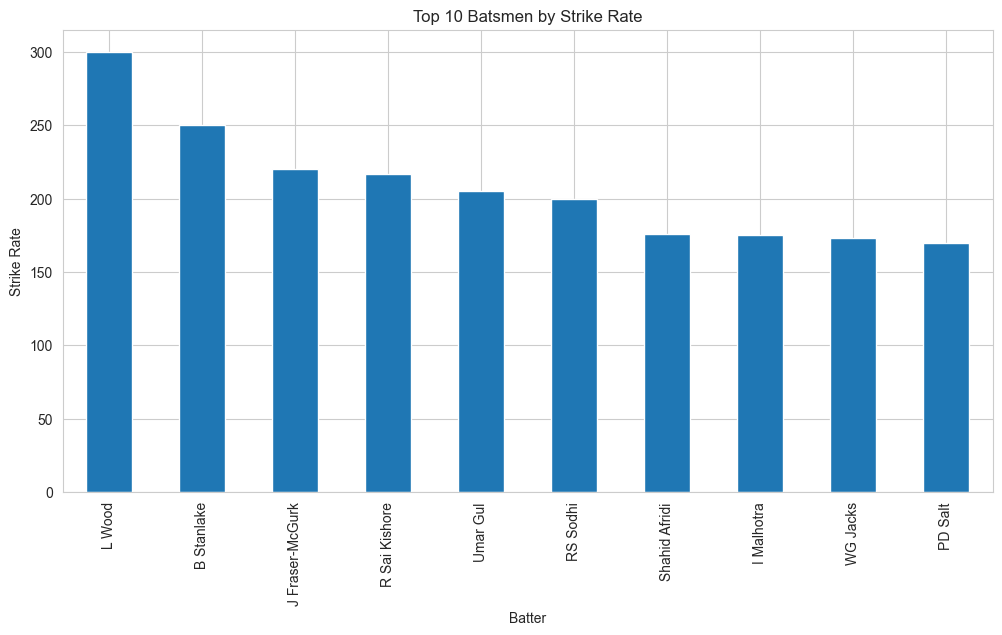

In [55]:
# Calculate strike rate
batsman_runs = deliveries.groupby('batter')['batsman_runs'].sum()
balls_faced = deliveries.groupby('batter').size()

strike_rate = (batsman_runs / balls_faced) * 100
strike_rate = strike_rate.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
strike_rate.plot(kind='bar')
plt.title("Top 10 Batsmen by Strike Rate")
plt.xlabel("Batter")
plt.ylabel("Strike Rate")
plt.show()
